# import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Set a consistent style for our plots for better readability
plt.style.use('ggplot')

# Load Dataset 

### Data Dictionary
Here's a breakdown of the key columns we'll be working with:

- **`Final_Diagnosis` (Target)**: The patient's diagnosis. Our goal is to predict this. (HC: Healthy Control, MCI: Mild Cognitive Impairment, AD: Alzheimer's Disease).
- **`Age`**: Age of the participant in years.
- **`Gender`**: Participant's gender.
- **`MoCA_Score` / `ICA_Score`**: Cognitive assessment scores. Lower scores generally indicate greater cognitive impairment.
- **`P_Tau_181_Level`**: Phosphorylated tau-181. A key protein biomarker for AD; higher levels are associated with AD pathology.
- **`NfL`**: Neurofilament light chain. A biomarker for nerve damage.
- **`AB_42` / `AB_40`**: Amyloid-beta peptides. The ratio of AB42 to AB40 is a crucial biomarker for AD.
- **`AB42_40_Ratio`**: The calculated ratio of AB42 to AB40, often a more powerful predictor than the individual peptides.
- **`APOE_Status`**: Apolipoprotein E gene variant. The `e4` allele is a significant genetic risk factor for AD.
- **`Family_History_Binary`**: Indicates if there is a family history of dementia.
- **`Source`**: Indicates if the data row is from a real patient or synthetically generated.

In [98]:
df = pd.read_csv('data\AD_Blood_Biomarkers.csv')
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,ID,Final_Diagnosis,BloodTestDate,ICATestDate,Age,Gender,Handedness,Education years,Job,Family_History of Dementia,...,AB40_42_Ratio,Prev._test_date,prev._ICA_score,prev._Speed,prev._Accuracy,prev._MoCA,GDS_score,Prev.GDS_score,BADLS,Source
0,1,HC,20-01-20,21-01-20,24.0,F,R,17.0,MS sudent,NaN,...,1.375440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Real
1,2,HC,20-01-20,21-01-20,26.0,F,R,18.0,MS student,NaN,...,1.614570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Real
2,3,HC,13-10-2020,13-10-2020,58.0,F,R,16.0,school principle,"鈥孻ES, aunt, uncle",...,1.234241,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,Real
3,4,MCI,26-01-20,26-01-20,61.0,M,R,18.0,computer engineer/retired,NO,...,0.535229,NaN,NaN,NaN,NaN,NaN,11.0,NaN,3.0,Real
4,5,HC,26-01-20,26-01-20,56.0,F,R,16.0,highschool teacher/retired,NO,...,2.607074,NaN,NaN,NaN,NaN,NaN,7.0,NaN,0.0,Real


# Data Analysis 

In [99]:
print("Dataset Info:")
df.info()

print("\nSummary Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          263 non-null    int64  
 1   Final_Diagnosis             263 non-null    object 
 2   BloodTestDate               263 non-null    object 
 3   ICATestDate                 263 non-null    object 
 4   Age                         263 non-null    float64
 5   Gender                      263 non-null    object 
 6   Handedness                  263 non-null    object 
 7   Education years             261 non-null    float64
 8   Job                         253 non-null    object 
 9   Family_History of Dementia  219 non-null    object 
 10  Family_History_Binary       219 non-null    object 
 11  memory complains            222 non-null    object 
 12  MoCA_Score                  251 non-null    float64
 13  ICA_Score            

,ID,Age,Education years,MoCA_Score,ICA_Score,Speed,Accuracy,P_Tau__181_Level,NfL,AB_42,AB_40,AB42_40_Ratio,AB40_42_Ratio,prev._ICA_score,prev._Speed,prev._Accuracy,prev._MoCA,GDS_score,Prev.GDS_score,BADLS
count,263.000000,263.000000,261.000000,251.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,118.000000,118.000000,118.000000,118.000000,169.000000,94.000000,195.000000
mean,132.000000,64.872814,13.745172,22.667331,61.169429,76.173460,79.206388,160.266759,181.531421,146.986520,146.191237,1.131793,1.091314,63.285424,77.087542,81.744746,25.852712,7.846272,7.494043,1.330000
std,76.065761,13.391093,7.512995,5.493180,15.697016,12.446677,12.715497,36.963680,36.759729,47.636555,52.146268,0.572885,0.492076,10.510577,8.670171,9.808899,2.395954,5.153534,5.097757,3.459558
min,1.000000,12.000000,0.000000,8.000000,16.000000,37.000000,44.000000,52.937500,78.647059,47.750000,47.411765,0.380000,0.338299,34.000000,51.000000,60.000000,19.000000,0.000000,1.000000,0.000000
25%,66.500000,61.795000,11.600000,19.020000,54.903199,69.225000,71.490000,138.851250,156.725000,108.785000,104.180000,0.760000,0.725000,61.555000,73.072500,78.862500,24.050000,4.000000,2.992500,0.000000
50%,132.000000,67.970000,14.090000,24.910000,62.548563,79.000000,83.700000,157.180000,181.850000,151.250000,145.120000,0.930000,1.090000,65.595000,78.940000,84.040000,26.045000,7.130000,6.210000,0.000000
75%,197.500000,72.270000,16.240000,26.275000,72.056209,85.665000,88.520000,185.111250,207.410294,179.275000,182.575000,1.375000,1.310000,69.342500,81.912500,89.577500,27.927500,10.770000,11.292500,0.270000
max,263.000000,85.000000,51.000000,29.000000,92.000000,100.000000,96.000000,237.312500,260.250000,245.670000,279.180000,2.955966,2.610000,79.000000,92.000000,94.000000,30.000000,24.000000,19.000000,17.000000


 Important Finding : 
- **Missing Values** : we find the number of missing entries in each feature.
- **Data Types**  :  its necessary for analysing and classification.
- **Scale of data**: reveals that numerical features are on very different scales. 

Distribution of Final Diagnosis:
Final_Diagnosis
HC         104
MCI         94
Mild-AD     65
Name: count, dtype: int64


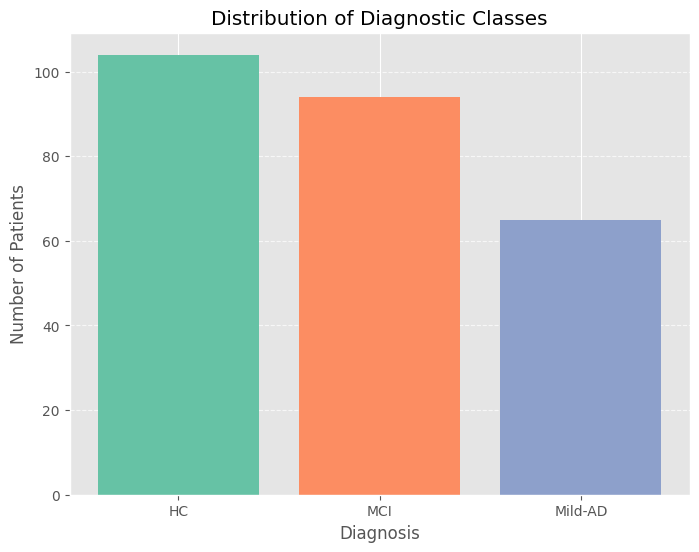

In [100]:

# Get the counts for each class
class_counts = df['Final_Diagnosis'].value_counts().loc[['HC', 'MCI', 'Mild-AD']]
print("Distribution of Final Diagnosis:")
print(class_counts)

# Visualize the distribution with Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['#66c2a5', '#fc8d62', '#8da0cb'])

plt.title('Distribution of Diagnostic Classes')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Number of Real data: 63


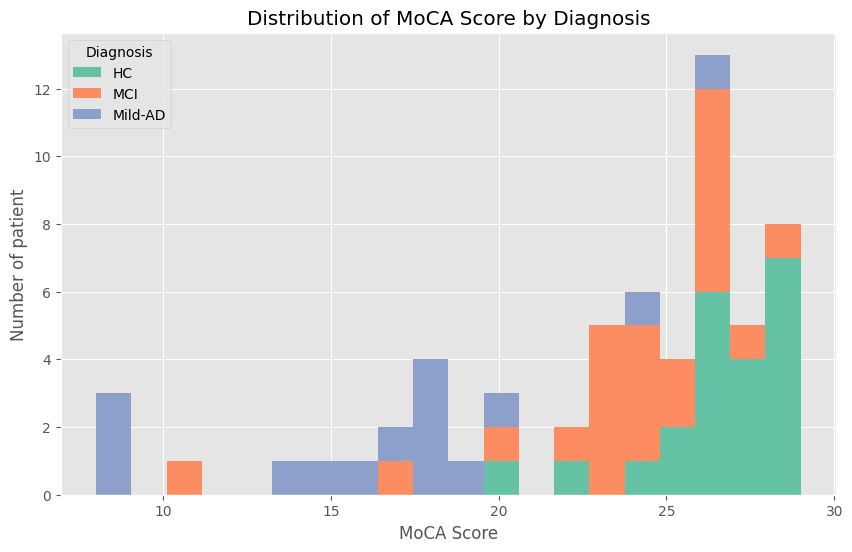

In [101]:
numberOfReal = df["Source"].value_counts()["Real"] 
print(f"Number of Real data: {numberOfReal}")

df_real = df.iloc[:numberOfReal]

categories = ['HC', 'MCI', 'Mild-AD']
data_to_plot = [df_real[df_real['Final_Diagnosis'] == cat]['MoCA_Score'].dropna() for cat in categories]

plt.figure(figsize=(10, 6))
plt.hist(data_to_plot, bins=20, stacked=True, label=categories, color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Distribution of MoCA Score by Diagnosis')
plt.xlabel('MoCA Score')
plt.ylabel('Number of patient')
plt.legend(title='Diagnosis')
plt.show()

.corr() : Compute pairwise correlation of Features, excluding NA/null values.
we use method = 'pearson' correlation which means :  standard correlation coefficient 

C:\Users\user\AppData\Local\Temp\ipykernel_22308\1954966363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['Gender'] = df_real['Gender'].replace({'M': 0, 'F': 1})


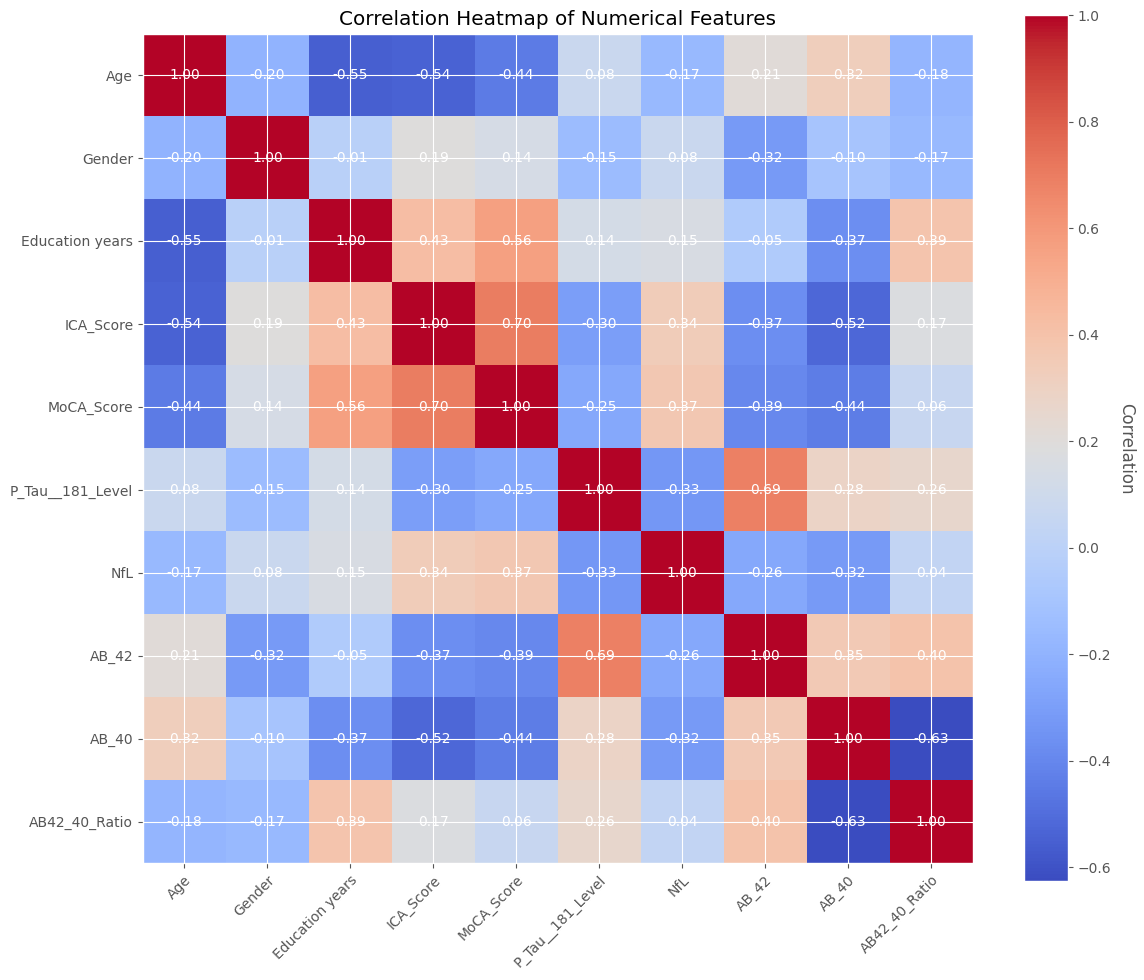

In [102]:
df_real['Gender'] = df_real['Gender'].replace({'M': 0, 'F': 1})
numerical_cols = ['Age', "Gender", 'Education years', 'ICA_Score','MoCA_Score','P_Tau__181_Level', 'NfL', 'AB_42', 'AB_40', 'AB42_40_Ratio']

corr_matrix = df_real[numerical_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr_matrix, cmap='coolwarm')

# Create the colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom")

# Set the ticks and labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="w")

ax.set_title("Correlation Heatmap of Numerical Features")
fig.tight_layout()
plt.show()

**Observation**: We see a strong negative correlation between cognitive scores (`MoCA_Score`, `ICA_Score`) and AD biomarkers (`P_Tau_181_Level`, `NfL`), which makes clinical sense: as biomarker levels indicative of disease go up, cognitive performance goes down.

# Data Preprocessing 

## Missing value 

**Our Strategy**:
- For **numerical columns**: Impute with the **median**.
- For **categorical columns**: Impute with the **mode**.
- For **previous test scores**: Fill with `0`, assuming missing means no prior test.

In [103]:
# Get a count of missing values per column
print("Missing Values Before Imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Impute numerical columns with the median
numerical_cols_to_impute = ['Education years', 'MoCA_Score', 'ICA_Score', 'P_Tau__181_Level', 'NfL', 'AB_42', 'AB_40']
for col in numerical_cols_to_impute:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Impute categorical columns with the mode
categorical_cols_to_impute = ['Gender', 'Handedness', 'Family_History_Binary', 'APOE_Status']
for col in categorical_cols_to_impute:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

# Handle previous test scores (fill with 0 if no prior test)
prev_cols = ['prev._ICA_score', 'prev._Speed', 'prev._Accuracy', 'prev._MoCA', 'Prev.GDS_score', 'Prev._test_date']
for col in prev_cols:
    df[col].fillna(0, inplace=True)

# Verify that all missing values are handled
print("\nMissing Values After Imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print(f"Total missing values remaining: {df.isnull().sum().sum()}")

Missing Values Before Imputation:
Education years                 2
Job                            10
Family_History of Dementia     44
Family_History_Binary          44
memory complains               41
MoCA_Score                     12
rs7412                         27
rs429358                       27
Prev._test_date               145
prev._ICA_score               145
prev._Speed                   145
prev._Accuracy                145
prev._MoCA                    145
GDS_score                      94
Prev.GDS_score                169
BADLS                          68
dtype: int64

Missing Values After Imputation:
Job                           10
Family_History of Dementia    44
memory complains              41
rs7412                        27
rs429358                      27
GDS_score                     94
BADLS                         68
dtype: int64
Total missing values remaining: 311


## check and fix feature types  

In [104]:
df["Family_History_Binary"] = df["Family_History_Binary"].replace({"N" : 0 , "Y":1})
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})

## Feature Scaling (Standardization)


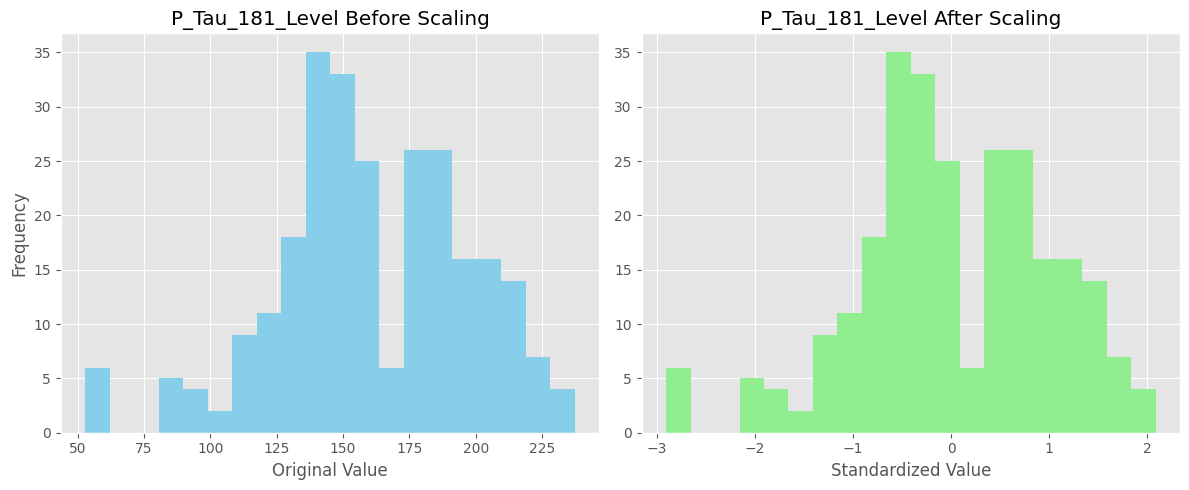

In [105]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.hist(df['P_Tau__181_Level'], bins=20, color='skyblue')
ax1.set_title('P_Tau_181_Level Before Scaling')
ax1.set_xlabel('Original Value')
ax1.set_ylabel('Frequency')

# Select numerical columns for scaling
numerical_cols_to_scale = ['Age', 'Education years', 'MoCA_Score', 'ICA_Score', 'P_Tau__181_Level', 'NfL', 'AB_42', 'AB_40', 'AB42_40_Ratio']

# Apply StandardScaler
scaler = StandardScaler()
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

# Visualize the distribution after scaling
ax2.hist(df['P_Tau__181_Level'], bins=20, color='lightgreen')
ax2.set_title('P_Tau_181_Level After Scaling')
ax2.set_xlabel('Standardized Value')
fig.tight_layout()
plt.show()

## save Preprocessed dataset 

In [108]:
# excluse some feature because we need them in modeling 
df_processed = df.drop(columns=['ID', 'Source', 'Handedness', 'prev._ICA_score', 'prev._Speed', 'prev._Accuracy', 'prev._MoCA', 'Prev.GDS_score'])

df_processed.to_csv('Preprocessed_dataset.csv', index=False)

# Training Machine Learning Models for AD Blood Biomarkers

## import libraries 

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import seaborn as sns
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Preprocessed Dataset 

In [4]:
Preprocessed_df = pd.read_csv("Preprocessed_dataset.csv")

# Separate our data into features (X) and the target (y)
X = Preprocessed_df[['Age','Gender','Family_History_Binary','MoCA_Score','ICA_Score','P_Tau__181_Level','NfL','AB_42','AB_40']]
y = Preprocessed_df['Final_Diagnosis']

# Display the first few rows of our features and target to confirm
print("Features (X) - first 5 rows:")
print(X.head())
print("\nTarget (y) - first 5 rows:")
print(y.head())


Features (X) - first 5 rows:
        Age  Gender  Family_History_Binary  MoCA_Score  ICA_Score  \
0 -3.058058       1                      0    0.398121   1.329570   
1 -2.908420       1                      0    0.398121   1.967849   
2 -0.514216       1                      1    0.786879   0.818948   
3 -0.289760       0                      0    0.042846   0.053014   
4 -0.663854       1                      0    0.972887   1.010431   

   P_Tau__181_Level       NfL     AB_42     AB_40  
0         -1.164282  1.556718 -0.999252 -0.179985  
1          0.563672 -0.271007 -1.339775 -0.225193  
2          1.071894 -2.804170  0.432948  1.164952  
3          1.512353  0.514594  1.314302 -0.654669  
4         -1.096519  0.706986 -1.840544  0.170376  

Target (y) - first 5 rows:
0     HC
1     HC
2     HC
3    MCI
4     HC
Name: Final_Diagnosis, dtype: object


## Train-Test Split
We'll use an 80/20 split: 80% of the data for training, and 20% for testing.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(210, 9), y_train=(210,)
Testing set shape: X_test=(53, 9), y_test=(53,)


## Train Model 

### Logestic Regression (Base Model)

In [6]:
model_lr = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

model_lr_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
model_lr_predictions

0.9245283018867925


,Actual,Predicted
139,HC,HC
216,Mild-AD,Mild-AD
39,HC,HC
61,MCI,MCI
48,HC,HC
125,MCI,MCI
2,HC,HC
209,HC,MCI
233,Mild-AD,Mild-AD
239,MCI,MCI


## hyperparameter tuning 
Grid search for Finding best hyperparameter 

In [10]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [147]:
best_models = {}
results = {}

models_and_parameters = {
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100,150],
            'max_depth': [None, 5, 10 , 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1]
        }
    }
}

#  GridSearch for all models :
for name, mp in models_and_parameters.items():
    print(f"Running GridSearch for {name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train_encoded)
    best_models[name] = grid.best_estimator_
    
    # predict and evaluation 
    y_pred = grid.best_estimator_.predict(X_test)
    acc = accuracy_score(y_test_encoded, y_pred)
    results[name] = {
        'best_params': grid.best_params_,
        'accuracy': acc
    }

Running GridSearch for SVM...
Running GridSearch for KNN...
Running GridSearch for LogisticRegression...
Running GridSearch for RandomForest...
Running GridSearch for XGBoost...


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:37:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [148]:
results_table = pd.DataFrame([
    {
        'Model': name,
        'Test Accuracy': f"{results[name]['accuracy']:.2%}",
        'Best Parameters': str(results[name]['best_params'])
    }
    for name in results
])

# Display Results : 

print(tabulate(results_table, headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════════════╤═════════════════╤════════════════════════════════════════════════════════════╕
│ Model              │ Test Accuracy   │ Best Parameters                                            │
╞════════════════════╪═════════════════╪════════════════════════════════════════════════════════════╡
│ SVM                │ 98.11%          │ {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}                │
├────────────────────┼─────────────────┼────────────────────────────────────────────────────────────┤
│ KNN                │ 96.23%          │ {'n_neighbors': 5, 'weights': 'distance'}                  │
├────────────────────┼─────────────────┼────────────────────────────────────────────────────────────┤
│ LogisticRegression │ 94.34%          │ {'C': 10, 'solver': 'lbfgs'}                               │
├────────────────────┼─────────────────┼────────────────────────────────────────────────────────────┤
│ RandomForest       │ 98.11%          │ {'max_depth': None, 'n_estimators': 50}  

## k-fold cross valiadtion 
Train on best Model 

In [11]:
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
best_model = RandomForestClassifier(max_depth=None ,n_estimators=50)

accuracies = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y_encoded)):
    print(f"Fold {fold+1}")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    model = best_model  
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"  Accuracy: {acc:.4f}")

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)

print("\nFinal Result:")
print(f"Accuracy (mean ± std): {mean_acc:.4f} ± {std_acc:.4f}")


Fold 1
  Accuracy: 0.9811
Fold 2
  Accuracy: 0.9811
Fold 3
  Accuracy: 0.9623
Fold 4
  Accuracy: 0.9423
Fold 5
  Accuracy: 0.9808

Final Result:
Accuracy (mean ± std): 0.9695 ± 0.0154


## calculate confusion matrix for last model 

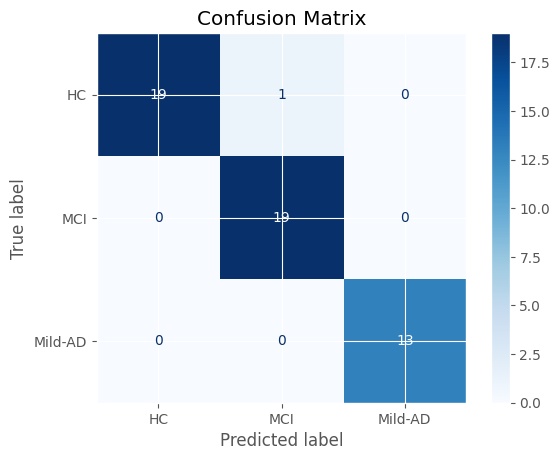

In [12]:
class_names = ['HC', 'MCI', 'Mild-AD']

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plotting
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_22308\1209080949.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance.head(10), x='Importance', y='Feature', palette='viridis')


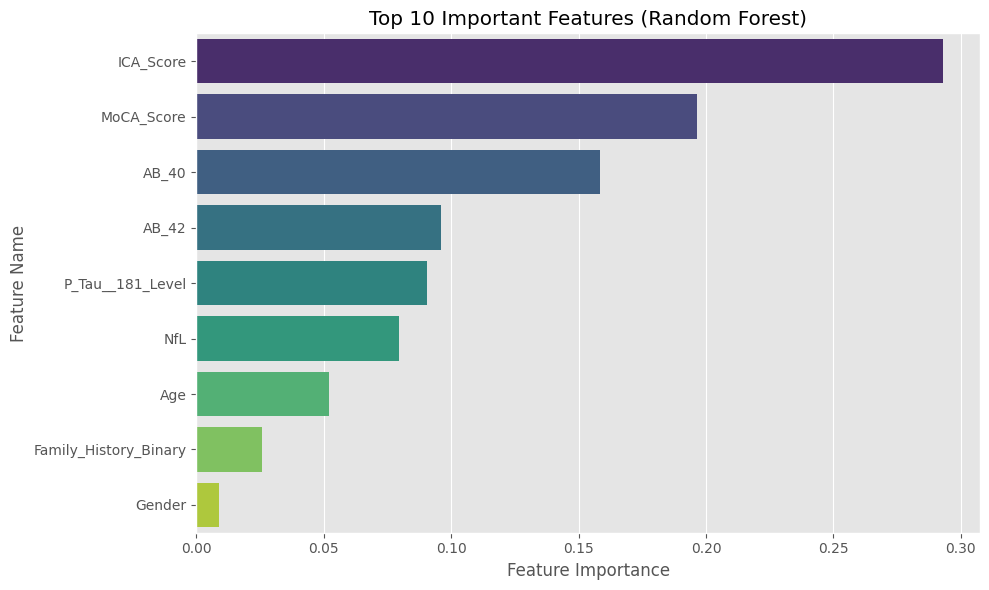

In [165]:
# Feature importance 
importances = model.feature_importances_

# create dataframe and sort features
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# plotting 
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()
